## Simulating dynamic systems with python

$$ \dot{\mathbf{x}} = f(\mathbf{x},t)$$

In [7]:
#%matplotlib inline
%matplotlib notebook 

import numpy as np
import ipywidgets 
import matplotlib.pyplot as plt
#from control import matlab
#import control
from scipy.integrate import odeint


In [8]:
def f(x, t):
    """
    Defines the differential equations for the dynamical system.
    Arguments:
        x :  vector of the state variables: x = [x1,x2,...,xn]
        t :  time
    """
    n = x.size # 
    # A = -0.8*np.eye(n) # stable linear system 
    #A = np.random.randn(n,n) # random matrix linear system 
    A = np.array([[-2,2.5],[-4,1]])# stable complex eigenvalues
    f = A @ x
    
    return f

In [9]:
# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 10.0
numpoints = 500

# Create the time samples for the output of the ODE solver.
# I use a large number of points, only because I want to make
# a plot of the solution that looks nice.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

x0 = np.array([0.5,5]) # initial condition
# Call the ODE solver.
x = odeint(f, x0, t, atol=abserr, rtol=relerr)


<IPython.core.display.Javascript object>


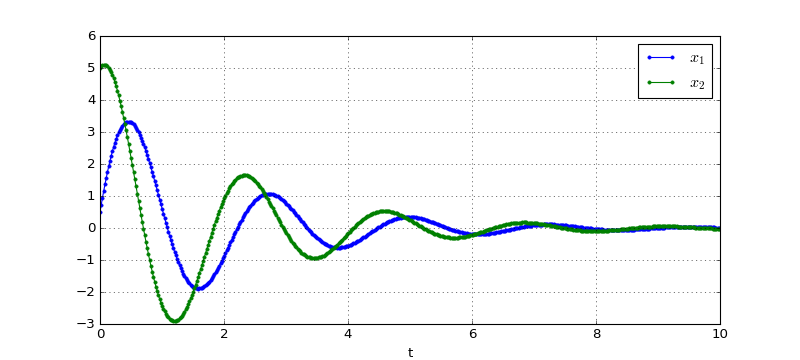

In [10]:
plt.figure(figsize=(10, 4.5))
lw = 1
plt.plot(t, x[:,0], 'b.-', linewidth=lw)
plt.plot(t, x[:,1], 'g.-', linewidth=lw)
plt.legend((r'$x_1$', r'$x_2$'))
plt.xlabel('t')
plt.grid()

<IPython.core.display.Javascript object>


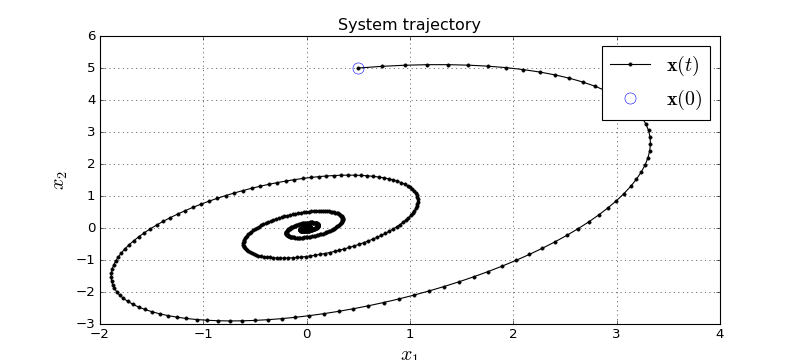

In [11]:
label_font_size = 18
plt.figure(figsize=(10, 4.5))
lw = 1
plt.plot(x[:,0], x[:,1], 'k.-', linewidth=lw,label='$\mathbf{x}(t)$')
plt.plot(x[0,0], x[0,1],'o',label='$\mathbf{x}(0)$', mfc='none',ms=10,mec='blue')
plt.xlabel('$x_1$',fontsize=label_font_size)
plt.ylabel('$x_2$',fontsize=label_font_size)
plt.grid()
plt.legend(fontsize=label_font_size,numpoints=1)
plt.title('System trajectory')